In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

## Loans Path:
#### Level 1: Exploring (1 point per task)
1. What are the different durations that loans are taken in and how many loans are taken for each duration?
2. What are the different statuses for the loans?
3. What are the different loan purposes and what is the most common purpose?
4. What is the median loan amount?
5. How is the median loan amount changing over the years? Visualize this
6. What are the top 3 most common locations that people take loans in? (The location is represented by a
number)
7. What is the average value of loans for each duration? Visualize this.

In [16]:
loan_data = pd.read_csv('completedloan.csv')
loan_data = loan_data.set_index('loan_id')
loan_data.head()

,account_id,amount,duration,payments,status,year,month,day,fulldate,location,purpose
loan_id,,,,,,,,,,,
L00005657,A00003354,4980,12,415,A,2014,7,5,2014-07-05,59,car
L00006234,A00006061,5148,12,429,C,2018,5,28,2018-05-28,1,car
L00006699,A00008330,7656,24,319,A,2014,3,30,2014-03-30,1,car
L00006688,A00008268,8616,24,359,C,2017,9,26,2017-09-26,1,car
L00006312,A00006453,10944,36,304,C,2018,5,17,2018-05-17,1,car


1. What are the different durations that loans are taken in and how many loans are taken for each duration?

In [17]:
loan_data['duration'].value_counts()

60    145
24    138
48    138
12    131
36    130
Name: duration, dtype: int64

2. What are the different statuses for the loans?

In [18]:
loan_data['status'].unique()

array(['A', 'C', 'B', 'D'], dtype=object)

3. What are the different loan purposes and what is the most common purpose?

In [19]:
loan_data['purpose'].value_counts()

home                  537
debt_consolidation     75
home_improvement       40
car                    30
Name: purpose, dtype: int64

4. What is the median loan amount?

In [21]:
loan_data['amount'].median()

116928.0

5. How is the median loan amount changing over the years? Visualize this

In [22]:
median_ammount = pd.DataFrame(loan_data.groupby(['year'])['amount'].median())
median_ammount

,amount
year,
2013,95898.0
2014,104808.0
2015,110718.0
2016,129408.0
2017,101520.0
2018,139776.0


<AxesSubplot:xlabel='year'>

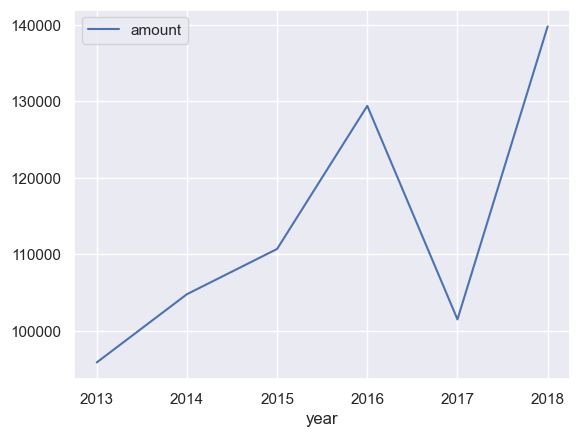

In [8]:
median_ammount.plot()

Text(0.5, 1.0, 'Medain Loan amount Over years')

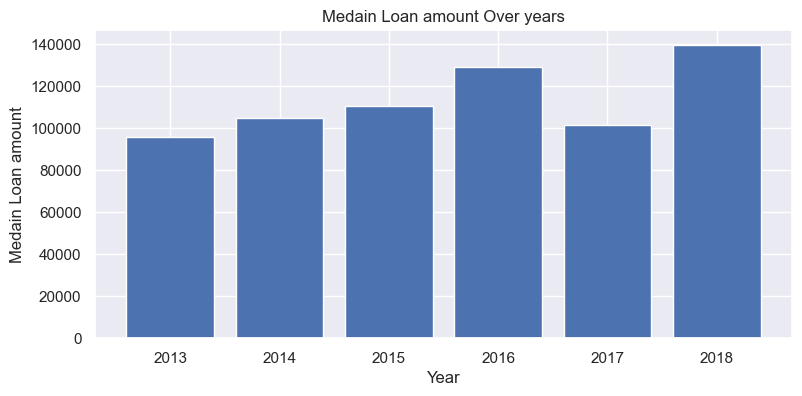

In [9]:
plt.figure(figsize=(9,4))
plt.bar(median_ammount.index,median_ammount['amount'])
plt.xlabel('Year')
plt.ylabel('Medain Loan amount')
plt.title('Medain Loan amount Over years')

6. What are the top 3 most common locations that people take loans in? (The location is represented by a
number)

In [23]:
max_3_location = pd.DataFrame(loan_data.groupby(['location'])['amount'].sum().sort_values(ascending=False).head(3))
max_3_location

,amount
location,
1,74345952
64,11698512
59,8044812


7. What is the average value of loans for each duration? Visualize this.

In [24]:
l = loan_data.nlargest(3,'amount')
l

,account_id,amount,duration,payments,status,year,month,day,fulldate,location,purpose
loan_id,,,,,,,,,,,
L00006534,A00007542,590820,60,9847,C,2017,10,19,2017-10-19,1,home
L00006791,A00008926,566640,60,9444,C,2018,1,23,2018-01-23,1,home
L00005447,A00002335,541200,60,9020,D,2017,11,12,2017-11-12,59,home


In [11]:
average_loan = pd.DataFrame(loan_data.groupby(['duration'])['amount'].mean())
average_loan

,amount
duration,
12,53635.511450
24,99217.913043
36,144048.184615
48,205592.695652
60,244450.758621


Text(0.5, 1.0, 'Average amount cross duration')

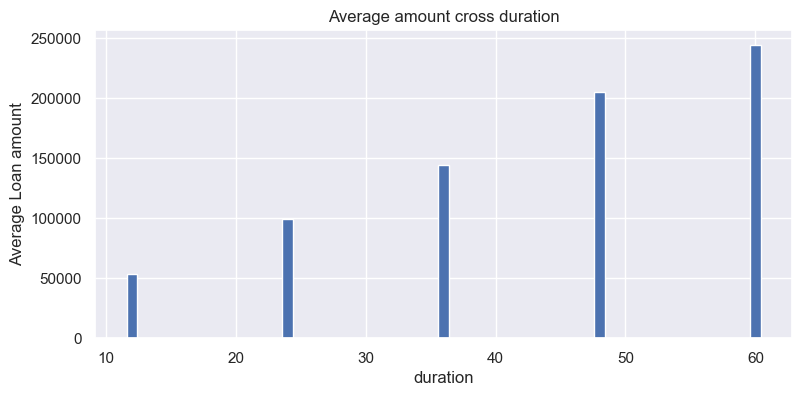

In [12]:
plt.figure(figsize=(9,4))
plt.bar(average_loan.index,average_loan['amount'])
plt.xlabel('duration')
plt.ylabel('Average Loan amount')
plt.title('Average amount cross duration')

## Level 2: Analyzing (3 points per task)
1. How many of the loans taken are by males and how many of them are by females?
2. Create categories for the ages of the clients
a. <25
b. 25-35
c. 35-45
d. 50-65
e. >65
3. Check which age group has the highest count of loans? Visualize this
4. Check which age group has the highest value of loans? Visualize this
5. Create categories for the loan “amounts”:
a. '-75K'
b. '75K-150K'
c. '150K-250K'
d. '250K-350K'
e. '350K+'
6. What are the different frequencies for loan payments?

1. How many of the loans taken are by males and how many of them are by females?

In [25]:
clinet_data = pd.read_csv('completedclient.csv')
disposition_data = pd.read_csv('completeddisposition.csv')

In [26]:
clinet_owner = disposition_data[disposition_data['type'] == 'Owner']
client_owner = clinet_owner['client_id']
clinet_owner = clinet_owner.merge(clinet_data,how='left',on ='client_id')
clinet_owner = clinet_owner[['sex','account_id','age']]
loan_data = loan_data.merge(clinet_owner,how='left',on='account_id')

In [27]:
loan_data['sex'].value_counts()

Female    348
Male      334
Name: sex, dtype: int64

2. Create categories for the ages of the clients
a. <25
b. 25-35
c. 35-45
d. 50-65
e. >65

In [28]:
loan_data['Age_Group'] = ''
loan_data['Age_Group'] = np.where(loan_data['age']<25,'<25',loan_data['Age_Group'])
loan_data['Age_Group'] = np.where((loan_data['age']>=25) & (loan_data['age'] < 35),'25-35',loan_data['Age_Group'])
loan_data['Age_Group'] = np.where((loan_data['age']>=35) & (loan_data['age'] < 45),'35-45',loan_data['Age_Group'])
loan_data['Age_Group'] = np.where((loan_data['age']>=45) & (loan_data['age'] < 55),'45-55',loan_data['Age_Group'])
loan_data['Age_Group'] = np.where((loan_data['age']>=55),'>55',loan_data['Age_Group'])

3. Check which age group has the highest count of loans? Visualize this

In [17]:
loan_data['Age_Group'].value_counts()

35-45    166
25-35    154
45-55    152
>55      128
<25       82
Name: Age_Group, dtype: int64

Text(0.5, 1.0, 'Loan Count Cross Age Group')

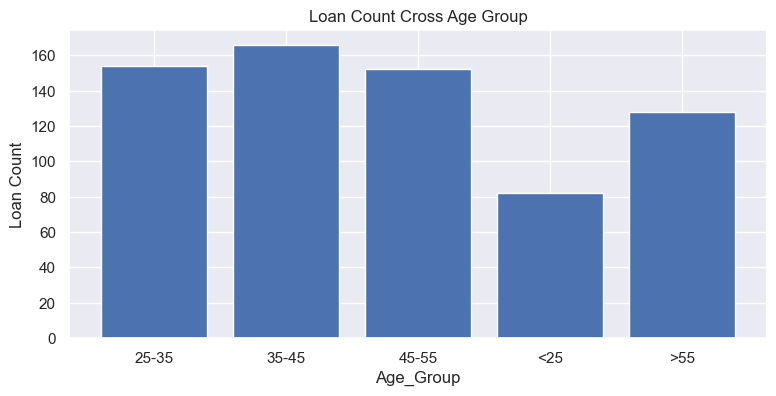

In [29]:
plt.figure(figsize=(9,4))
plt.bar(loan_data['Age_Group'].value_counts().keys().sort_values(),loan_data['Age_Group'].value_counts().sort_index())
plt.xlabel('Age_Group')
plt.ylabel('Loan Count')
plt.title('Loan Count Cross Age Group')

4. Check which age group has the highest value of loans? Visualize this

In [19]:
loan_data.groupby(['Age_Group'])['amount'].sum()

Age_Group
25-35    24188472
35-45    24350700
45-55    23345196
<25      13660932
>55      17716440
Name: amount, dtype: int64

Text(0.5, 1.0, 'Total Loan Cross Age Group')

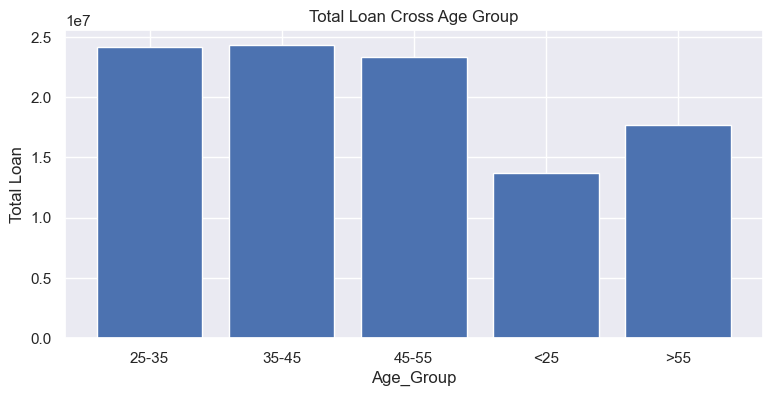

In [20]:
plt.figure(figsize=(9,4))
plt.bar(loan_data.groupby(['Age_Group'])['amount'].sum().keys().sort_values(),
        loan_data.groupby(['Age_Group'])['amount'].sum().sort_index())
plt.xlabel('Age_Group')
plt.ylabel('Total Loan')
plt.title('Total Loan Cross Age Group')

5. Create categories for the loan “amounts”:
a. '-75K'
b. '75K-150K'
c. '150K-250K'
d. '250K-350K'
e. '350K+'

In [30]:
loan_data['Amount_Group'] = ''
loan_data['Amount_Group'] = np.where(loan_data['amount']<75000,'-75K',loan_data['Amount_Group'])
loan_data['Amount_Group'] = np.where((loan_data['amount']>=75000) & (loan_data['amount'] < 150000),'75K-150K'
                                     ,loan_data['Amount_Group'])
loan_data['Amount_Group'] = np.where((loan_data['amount']>=150000) & (loan_data['amount'] < 250000),'150K-250K',
                                     loan_data['Amount_Group'])
loan_data['Amount_Group'] = np.where((loan_data['amount']>=250000) & (loan_data['amount'] < 350000),'250K-350K',
                                     loan_data['Amount_Group'])
loan_data['Amount_Group'] = np.where((loan_data['amount']>=350000),'>350K',loan_data['Amount_Group'])

6. What are the different frequencies for loan payments?

In [22]:
loan_data['Amount_Group'].value_counts()

-75K         206
75K-150K     189
150K-250K    161
250K-350K     78
>350K         48
Name: Amount_Group, dtype: int64

## Level 3: Modeling
1. Create a model to predict the transaction purpose (10 points)
a. Try out at least 3 different models, and comment on why you chose these models
b. Measure accuracy (at least one model should have accuracy of 80% or higher)
2. Create a model to predict the transaction "amount category" (10 points)
a. Try out at least 3 different models, and comment on why you chose these models
b. Measure accuracy (at least one model should have accuracy of 80% or higher)
3. Time to clean up your work. Organize your notebook, gather your findings, prepare recommendations and
get ready to present them. (5 points)

In [31]:
raw_data = loan_data.copy()

In [32]:
raw_data.columns

Index(['account_id', 'amount', 'duration', 'payments', 'status', 'year',
       'month', 'day', 'fulldate', 'location', 'purpose', 'sex', 'age',
       'Age_Group', 'Amount_Group'],
      dtype='object')

In [33]:
features = ['amount', 'duration', 'payments', 'status', 'year',
       'month', 'day', 'location', 'purpose', 'sex', 'age',
       'Age_Group', 'Amount_Group']

In [34]:
raw_data = raw_data[features]

In [35]:
le = LabelEncoder()
le.fit(raw_data['purpose'])

LabelEncoder()

In [36]:
raw_data['purpose'] = le.fit_transform(raw_data['purpose'])
raw_data['purpose'].unique()

array([0, 1, 3, 2])

In [37]:
raw_data = pd.get_dummies(raw_data,drop_first=True)

In [38]:
inputs = raw_data.drop('purpose',axis=1)
target = raw_data['purpose']

In [39]:
inputs

,amount,duration,payments,year,month,day,location,age,status_B,status_C,status_D,sex_Male,Age_Group_35-45,Age_Group_45-55,Age_Group_<25,Age_Group_>55,Amount_Group_150K-250K,Amount_Group_250K-350K,Amount_Group_75K-150K,Amount_Group_>350K
0,4980,12,415,2014,7,5,59,47,0,0,0,0,0,1,0,0,0,0,0,0
1,5148,12,429,2018,5,28,1,36,0,1,0,0,1,0,0,0,0,0,0,0
2,7656,24,319,2014,3,30,1,37,0,0,0,0,1,0,0,0,0,0,0,0
3,8616,24,359,2017,9,26,1,24,0,1,0,1,0,0,1,0,0,0,0,0
4,10944,36,304,2018,5,17,1,48,0,1,0,1,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
677,504000,60,8400,2018,1,20,18,28,0,1,0,1,0,0,0,0,0,0,0,1
678,538500,60,8975,2015,2,17,64,39,0,1,0,1,1,0,0,0,0,0,0,1
679,541200,60,9020,2017,11,12,59,53,0,0,1,0,0,1,0,0,0,0,0,1
680,566640,60,9444,2018,1,23,1,27,0,1,0,0,0,0,0,0,0,0,0,1


In [40]:
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.15,random_state=1234)

In [41]:
x_train

,amount,duration,payments,year,month,day,location,age,status_B,status_C,status_D,sex_Male,Age_Group_35-45,Age_Group_45-55,Age_Group_<25,Age_Group_>55,Amount_Group_150K-250K,Amount_Group_250K-350K,Amount_Group_75K-150K,Amount_Group_>350K
309,100800,24,4200,2017,8,15,1,61,0,0,1,1,0,0,0,1,0,0,1,0
409,155640,24,6485,2016,8,4,1,57,0,0,0,0,0,0,0,1,1,0,0,0
671,466608,48,9721,2017,6,13,46,53,0,1,0,0,0,1,0,0,0,0,0,1
533,228276,36,6341,2016,11,22,1,38,0,1,0,1,1,0,0,0,1,0,0,0
604,307200,60,5120,2017,5,2,1,37,0,0,1,1,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
664,428784,48,8933,2018,2,13,46,63,0,1,0,1,0,0,0,1,0,0,0,1
372,136344,24,5681,2018,5,21,46,35,0,1,0,0,1,0,0,0,0,0,1,0
204,74772,36,2077,2017,7,1,64,39,0,1,0,1,1,0,0,0,0,0,0,0
53,30060,60,501,2016,6,15,64,48,0,1,0,1,0,1,0,0,0,0,0,0


## Model_1

In [32]:
model_1 = LogisticRegression(max_iter=300)
solvers = ['sag','lbfgs']
penalty = ['l2']
c_values = [0.01,0.1,0.2,0.5,0.8,10]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
#cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_1, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.892939 using {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.784138 (0.008818) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.891199 (0.012835) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.784138 (0.008818) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.892939 (0.011527) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.784138 (0.008818) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'sag'}
0.887751 (0.009285) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
0.784138 (0.008818) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'sag'}
0.891199 (0.013945) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.784138 (0.008818) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'sag'}
0.892924 (0.013967) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'lbfgs'}
0.784138 (0.008818) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.889475 (0.016646) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [33]:
model_1 = LogisticRegression(C=0.1,penalty ='l2',solver = 'lbfgs',multi_class='multinomial')
model_1.fit(x_train,y_train)
target_1 = model_1.predict(x_test)
print(classification_report(y_test,target_1,target_names=['car', 'debt_consolidation', 'home', 'home_improvement']))
print(accuracy_score(y_test,target_1)*100)
print(list(le.inverse_transform([0,1,2,3])))

                    precision    recall  f1-score   support

               car       0.67      1.00      0.80         2
debt_consolidation       0.50      0.89      0.64         9
              home       1.00      0.98      0.99        86
  home_improvement       0.00      0.00      0.00         6

          accuracy                           0.91       103
         macro avg       0.54      0.72      0.61       103
      weighted avg       0.89      0.91      0.90       103

91.2621359223301
['car', 'debt_consolidation', 'home', 'home_improvement']


C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set

## Model_2

In [34]:
model_2 = RandomForestClassifier(random_state=1234)
model_2.fit(x_train,y_train)
target_2 = model_2.predict(x_test)
print(classification_report(y_test,target_2,target_names=['car' ,'debt_consolidation' ,'home' ,'home_improvement']))
print(accuracy_score(y_test,target_2)*100)
print(le.inverse_transform([0,1,2,3]))

                    precision    recall  f1-score   support

               car       0.67      1.00      0.80         2
debt_consolidation       0.50      0.56      0.53         9
              home       0.97      1.00      0.98        86
  home_improvement       0.00      0.00      0.00         6

          accuracy                           0.90       103
         macro avg       0.53      0.64      0.58       103
      weighted avg       0.86      0.90      0.88       103

90.29126213592234
['car' 'debt_consolidation' 'home' 'home_improvement']


## Model_3

In [35]:
model_3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_3.fit(x_train, y_train)
target_3 = model_3.predict(x_test)
print(classification_report(y_test,target_3,target_names=['car' ,'debt_consolidation' ,'home' ,'home_improvement']))
print(accuracy_score(y_test,target_3)*100)

                    precision    recall  f1-score   support

               car       0.67      1.00      0.80         2
debt_consolidation       0.45      0.56      0.50         9
              home       0.95      0.98      0.97        86
  home_improvement       1.00      0.17      0.29         6

          accuracy                           0.89       103
         macro avg       0.77      0.67      0.64       103
      weighted avg       0.91      0.89      0.88       103

89.32038834951457


2. Create a model to predict the transaction "amount category" (10 points)
a. Try out at least 3 different models, and comment on why you chose these models
b. Measure accuracy (at least one model should have accuracy of 80% or higher)

In [36]:
raw_data = loan_data.copy()
features = ['amount', 'duration', 'payments', 'status', 'year',
       'month', 'day', 'location', 'purpose', 'sex', 'age',
       'Age_Group', 'Amount_Group']
raw_data = raw_data[features]

In [37]:
le.fit(raw_data['Amount_Group'])
raw_data['Amount_Group'] = le.fit_transform(raw_data['Amount_Group'])
raw_data['Amount_Group'].unique()

array([0, 3, 1, 2, 4])

In [38]:
raw_data = pd.get_dummies(raw_data,drop_first=True)
inputs = raw_data.drop('Amount_Group',axis=1)
target = raw_data['Amount_Group']
x_train,x_test,y_train,y_test = train_test_split(inputs,target,test_size=0.15,random_state=1234)

## Model_1 (Amount_Category)

In [39]:
model_1 = LogisticRegression(max_iter=300)
solvers = ['sag','lbfgs']
penalty = ['l2']
c_values = [0.01,0.1,0.2,0.5,0.8,10]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model_1, param_grid=grid, n_jobs=-1, cv=5, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(x_train, y_train)


print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']


for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.994813 using {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.666702 (0.023019) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'sag'}
0.989640 (0.008444) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
0.666702 (0.023019) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'sag'}
0.989625 (0.010074) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.666702 (0.023019) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'sag'}
0.989625 (0.010074) with: {'C': 0.2, 'penalty': 'l2', 'solver': 'lbfgs'}
0.666702 (0.023019) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'sag'}
0.991364 (0.009444) with: {'C': 0.5, 'penalty': 'l2', 'solver': 'lbfgs'}
0.666702 (0.023019) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'sag'}
0.989640 (0.008444) with: {'C': 0.8, 'penalty': 'l2', 'solver': 'lbfgs'}
0.666702 (0.023019) with: {'C': 10, 'penalty': 'l2', 'solver': 'sag'}
0.994813 (0.004236) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}


C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
model_1 = LogisticRegression(C=10,penalty ='l2',solver = 'lbfgs',multi_class='multinomial')
model_1.fit(x_train,y_train)
target_1 = model_1.predict(x_test)
print(classification_report(y_test,target_1))
print(accuracy_score(y_test,target_1)*100)
print(list(le.inverse_transform([0,1,2,3])))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        30
           1       1.00      1.00      1.00        26
           2       0.77      0.67      0.71        15
           3       1.00      1.00      1.00        26
           4       0.38      0.50      0.43         6

    accuracy                           0.92       103
   macro avg       0.83      0.83      0.83       103
weighted avg       0.93      0.92      0.93       103

92.23300970873787
['-75K', '150K-250K', '250K-350K', '75K-150K']


C:\Users\Amro Ewes\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Model_2

In [41]:
model_2 = RandomForestClassifier(random_state=1234)
model_2.fit(x_train,y_train)
target_2 = model_2.predict(x_test)
print(classification_report(y_test,target_2,target_names=['-75K' ,'150K-250K' ,'250K-350K' ,'75K-150K' ,'>350K']))
print(accuracy_score(y_test,target_2)*100)
print(le.inverse_transform([0,1,2,3]))

              precision    recall  f1-score   support

        -75K       1.00      1.00      1.00        30
   150K-250K       0.93      1.00      0.96        26
   250K-350K       0.93      0.87      0.90        15
    75K-150K       1.00      1.00      1.00        26
       >350K       1.00      0.83      0.91         6

    accuracy                           0.97       103
   macro avg       0.97      0.94      0.95       103
weighted avg       0.97      0.97      0.97       103

97.0873786407767
['-75K' '150K-250K' '250K-350K' '75K-150K']


## Model_3

In [42]:
model_3 = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
model_3.fit(x_train, y_train)
target_3 = model_3.predict(x_test)
print(classification_report(y_test,target_3,target_names=['-75K' ,'150K-250K' ,'250K-350K' ,'75K-150K' ,'>350K']))
print(accuracy_score(y_test,target_3)*100)
print(le.inverse_transform([0,1,2,3,4]))

              precision    recall  f1-score   support

        -75K       1.00      1.00      1.00        30
   150K-250K       0.93      1.00      0.96        26
   250K-350K       1.00      0.87      0.93        15
    75K-150K       1.00      1.00      1.00        26
       >350K       1.00      1.00      1.00         6

    accuracy                           0.98       103
   macro avg       0.99      0.97      0.98       103
weighted avg       0.98      0.98      0.98       103

98.05825242718447
['-75K' '150K-250K' '250K-350K' '75K-150K' '>350K']
